In [1]:
import numpy as np
import itertools

In [2]:
program=np.loadtxt('./D13input.txt',delimiter=',').astype(int)
program=np.concatenate([program,np.zeros(100000).astype(int)])

3032


In [3]:
# 'cheating' by adding a bunch of '3's in the input file, "long paddle"
program2=np.loadtxt('./D13input-Copy.txt',delimiter=',').astype(int)  
program2=np.concatenate([program2,np.zeros(100000).astype(int)])
program2[0]=2

In [4]:
def diagno2(index,data,input_arr):
    ind=index #position of the pointer
    input_ind=0 #pointer of the phase settings and input
    output=0
    output_arr=[]
    base=0
    a=data.copy()
    while(True):
        instr=list(reversed(str(a[ind])))
        if len(instr)<5:
            for i in range(5-len(instr)):
                instr.append('0')

        if instr[1]!='0':
            if (instr[0]=='9')&(instr[1]=='9'):
                output='Halt!' #amplifier terminates by itself
                break
            else:
                print('second digit not zero')
                break


        if instr[0] in '1256789':
            if instr[-1]=='1':
                print('stores in immediate mode!')
                break
            para=np.zeros(2).astype(int)
            for i,it in enumerate(instr[2:4]):
                if it=='0':
                    para[i]=a[a[ind+1+i]]
                elif it=='1':
                    para[i]=a[ind+1+i]
                elif it=='2':
                    para[i]=a[base+a[ind+1+i]]
            
            if instr[0] in '12789':
                ind_temp=ind
                if instr[0]=='1':
                    store=para[0]+para[1]
                    ind+=4
                elif instr[0]=='2':
                    store=para[0]*para[1]
                    ind+=4
                elif instr[0]=='7':
                    if para[0]<para[1]:
                        store=1
                    else:
                        store=0
                    ind+=4
                elif instr[0]=='8':
                    if para[0]==para[1]:
                        store=1
                    else:
                        store=0
                    ind+=4
                elif instr[0]=='9':
                    base+=para[0]
                    ind+=2

                if instr[-1]=='0':
                    a[a[ind_temp+3]]=store
                if instr[-1]=='2':
                    a[base+a[ind_temp+3]]=store
                
            elif instr[0]=='5':
                if para[0]!=0:
                    ind=para[1]
                else:
                    ind+=3
            elif instr[0]=='6':
                if para[0]==0:
                    ind=para[1]
                else:
                    ind+=3
                    
        elif instr[0]=='3':
            if instr[2]=='0':
                a[a[ind+1]]=int(input_arr[input_ind]) #phase settings or inputs
            elif instr[2]=='2':
                a[base+a[ind+1]]=int(input_arr[input_ind])
            input_ind+=1
            ind+=2
            
        elif instr[0]=='4':
            if instr[2]=='0':
                output=a[a[ind+1]]
            elif instr[2]=='1':
                output=a[ind+1]
            elif instr[2]=='2':
                output=a[base+a[ind+1]]
            output_arr.append(output)
            ind+=2
        else:
            print('must be 1-9!')
            break

    #return outputs and save the status of the amplifier
    return output_arr, ind, a 

# Part 1 #

In [22]:
def finalfield(program):
    out,_,_=diagno2(0,program,np.zeros(100000))
    out_re=np.array(out).reshape((-1,3))
    dim=np.amax(out_re,axis=0)
    field=np.zeros((dim[1]+1,dim[0]+1),dtype=int)
    for it in out_re:
        field[it[1],it[0]]=it[2]
    return field

In [23]:
f1=finalfield(program)

In [25]:
(f1==2).sum()

324

In [26]:
import matplotlib.pyplot as plt

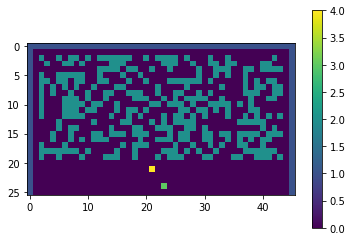

In [28]:
plt.imshow(f1)
plt.colorbar()
plt.show()

# Part 2 #

In [29]:
f2=finalfield(program2)

In [30]:
f2[f2>4][0]

15957